In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [71]:
df = pd.read_csv('titanic_toy.csv')

In [72]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [73]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [74]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

In [76]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [77]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [78]:
median_Age = X_train['Age'].median()
mean_Age = X_train['Age'].mean()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [79]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_age)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_age)

In [80]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
790,NaN,7.7500,0,28.75,29.785904,7.7500,7.7500
489,9.0,15.9000,2,9.00,9.000000,15.9000,15.9000
262,52.0,79.6500,2,52.00,52.000000,79.6500,79.6500
524,NaN,7.2292,0,28.75,29.785904,7.2292,7.2292
144,18.0,11.5000,0,18.00,18.000000,11.5000,11.5000


In [81]:
print('original age variable variance: ', X_train['Age'].var())
print('Age variance after mean imputation: ', X_train['Age_mean'].var())
print('age variance after median imputation: ', X_train['Age_median'].var())

print('original fare variable variance: ', X_train['Fare'].var())
print('fare variance after mean imputation: ', X_train['Fare_mean'].var())
print('fare variance after median imputation: ', X_train['Fare_median'].var())

original age variable variance:  204.3495133904614
Age variance after mean imputation:  161.81262452718673
age variance after median imputation:  161.9895663346054
original fare variable variance:  2448.197913706318
fare variance after mean imputation:  2324.623996772905
fare variance after median imputation:  2324.9576136149317


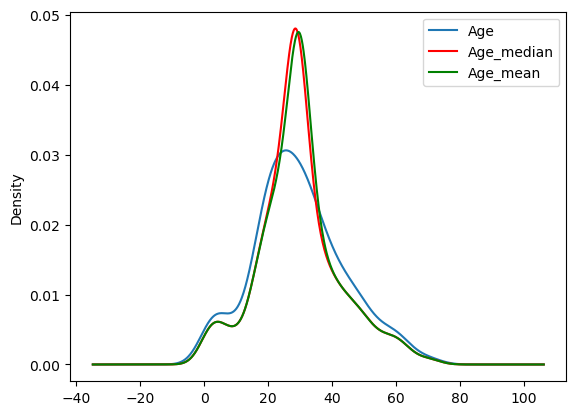

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind = 'kde', ax = ax)

# variable imputed qith the median
X_train['Age_median'].plot(kind = 'kde', ax = ax, color = 'red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind = 'kde', ax = ax, color = 'green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

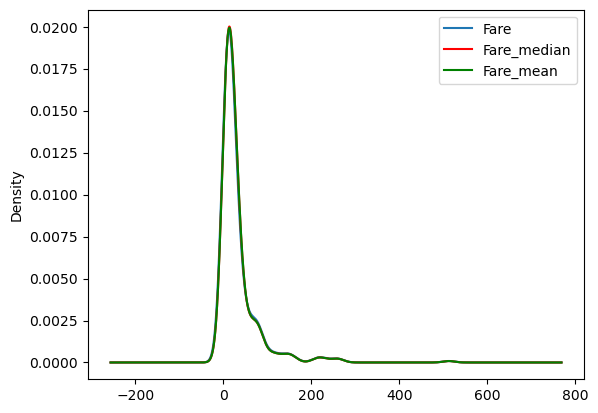

In [83]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind = 'kde', ax = ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind = 'kde', ax = ax, color = 'red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind = 'kde', ax = ax, color = 'green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

In [84]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.280487,66.383530
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.404484,16.399278
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,54.710043,54.793876
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.483705,52.565299
Fare_median,66.280487,2448.197914,16.404484,54.710043,52.483705,2324.957614,2324.765012
Fare_mean,66.383530,2448.197914,16.399278,54.793876,52.565299,2324.765012,2324.623997


In [85]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.089604,0.089754
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205710,0.205660
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.089149,0.089292
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.085568,0.085707
Fare_median,0.089604,1.000000,0.205710,0.089149,0.085568,1.000000,0.999989
Fare_mean,0.089754,1.000000,0.205660,0.089292,0.085707,0.999989,1.000000


<Axes: >

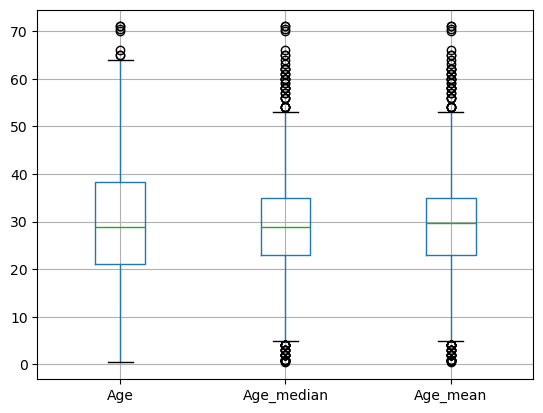

In [86]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

# using sklearn

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [88]:
imputer1 = SimpleImputer(strategy = 'median')
imputer2 = SimpleImputer(strategy = 'mean')

In [89]:
trf = ColumnTransformer ([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
], remainder = 'passthrough')

In [90]:
trf.fit(X_train)

C:\Users\Nadim Ansari\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [91]:
ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [92]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [93]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [94]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [95]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])